In [1]:
import cv2
from ultralytics import YOLO
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
model = YOLO('model/best.pt')

In [6]:
# video_path = "multiple_rgby_01.mp4"
# video_path = "multiple_rgby_06.mp4"
video_path = "multiple_rgby_44.mp4"

cap = cv2.VideoCapture(video_path)
# cap = cv2.VideoCapture(1)

track_history = defaultdict(lambda: [])
count = 0 
while cap.isOpened():
    success, frame = cap.read()

    if success:
        count+=1
        results = model.track(frame, persist=True)

        if results[0].boxes.id != None:
            boxes = results[0].boxes.xywh.cpu()
            track_ids = results[0].boxes.id.int().cpu().tolist()

            annotated_frame = results[0].plot()

            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                track = track_history[track_id]
                track.append((float(x), float(y)))

                points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
                cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=8)

            cv2.imshow("YOLOv8 Tracking", annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 red_cube, 1 blue_cube, 1 yellow_cube, 320.8ms
Speed: 14.1ms preprocess, 320.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125)]
[[[520 309]]]
[(374.93951416015625, 277.72882080078125)]
[[[374 277]]]
[(675.6337890625, 346.5174255371094)]
[[[675 346]]]


0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 179.5ms
Speed: 4.0ms preprocess, 179.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781)]
[[[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219)]
[[[374 277]]

 [[370 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875)]
[[[675 346]]

 [[675 346]]]
[(836.7862548828125, 385.3190002441406)]
[[[836 385]]]


0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 163.2ms
Speed: 4.0ms preprocess, 163.2ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625)]
[[[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375)]
[[[374 277]]

 [[370 277]]

 [[367 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875)]
[[[675 346]]

 [[675 346]]

 [[675 346]]]
[(836.7862548828125, 385.3190002441406), (836.2479248046875, 385.215087890625)]
[[[836 385]]

 [[836 385]]]


0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 177.9ms
Speed: 4.1ms preprocess, 177.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469)]
[[[374 277]]

 [[370 277]]

 [[367 277]]

 [[367 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875)]
[[[675 346]]

 [[675 346]]

 [[675 346]]

 [[675 346]]]
[(836.7862548828125, 385.3190002441406), (836.2479248046875, 385.215087890625), (836.554443359375, 385.1343994140625)]
[[[836 385]]

 [[836 385]]

 [[836 385]]]


0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 164.5ms
Speed: 5.0ms preprocess, 164.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875)]
[[[374 277]]

 [[370 277]]

 [[367 277]]

 [[367 277]]

 [[366 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375)]
[[[675 346]]

 [[675 346]]

 [[675 346]]

 [[675 346]]

 [[675 346]]]
[(836.7862548828125, 385.3190002441406), (836.2479248046875, 385.215087890625), (836.554443359375, 385.1343994140625), (836.8258056640625, 385.1300048828125)]
[[[836 385]]

 [[836 385]]

 [[

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 172.8ms
Speed: 3.0ms preprocess, 172.8ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656)]
[[[374 277]]

 [[370 277]]

 [[367 277]]

 [[367 277]]

 [[366 277]]

 [[366 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375)]
[[[675 346]]

 [[675 346]]

 [[675 346]]

 [[675 346]]

 [[675 346]]

 [[675 346]]]
[(836.7862548828125, 385.3190

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 174.3ms
Speed: 3.0ms preprocess, 174.3ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.00018310546875, 277.77557373046875)]
[[[374 277]]

 [[370 277]]

 [[367 277]]

 [[367 277]]

 [[366 277]]

 [[366 277]]

 [[367 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 167.4ms
Speed: 4.0ms preprocess, 167.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.00018310546875, 277.77557373046875), (367.10296630859375, 277.78582763671875)]
[[[374 277]]

 [[370 277]]

 [[367 277]]

 [[367 277]]

 [[366 277]]

 [[366 277]]

 [[367 277]]

 [[367 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.730590

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 176.4ms
Speed: 7.1ms preprocess, 176.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.00018310546875, 277.77557373046875), (367.10296630859375, 277.78582763671875), (367.0930480957031, 277.7647705078125)]
[[[374 277]]

 [[370 277]]

 [[367 277]]

 [[367 277]]

 [[366 277]]

 [[366 277]]

 [[367 277]]

 [[367 277]]

 [[367 277]]]
[(675.6337890625, 346.

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 168.7ms
Speed: 3.0ms preprocess, 168.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.00018310546875, 277.77557373046875), (367.10296630859375, 277.78582763671875), (367.0930480957031, 277.7647705078125), (367.1527404785156, 277.62841796875)]
[[[374 277]]

 [[370 277]]

 [[367 277]]

 [[367 277]]

 [

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 168.9ms
Speed: 5.0ms preprocess, 168.9ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.00018310546875, 277.77557373046875), (367.10296630859375, 277.78582763671875), (367.0930480957031, 277.7647705078125), (367.1527404785156, 277.62841796875), (367.3

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 166.0ms
Speed: 3.0ms preprocess, 166.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.00018310546875, 277.77557373046875), (367.10296630859375, 277.78582763671875), (367.0930480957031, 277.764770

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 175.2ms
Speed: 3.0ms preprocess, 175.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.00018310546875, 277.77557373046875), (367.1029663085937

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 174.4ms
Speed: 0.0ms preprocess, 174.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.7615966796875), (366.8729248046875, 277.8065490722656), (367.

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 174.1ms
Speed: 3.0ms preprocess, 174.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875, 277.7209167480469), (366.8750305175781, 277.76159667

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 177.3ms
Speed: 3.0ms preprocess, 177.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.883056640625, 277.64886474609375), (367.10614013671875

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 172.6ms
Speed: 3.0ms preprocess, 172.6ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.72882080078125), (370.0180358886719, 277.7587585449219), (367.8

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 164.9ms
Speed: 4.4ms preprocess, 164.9ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(374.93951416015625, 277.728820800

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 173.1ms
Speed: 3.0ms preprocess, 173.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 172.5ms
Speed: 4.0ms preprocess, 172.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 176.2ms
Speed: 4.0ms preprocess, 176.2ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 171.2ms
Speed: 2.9ms preprocess, 171.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 187.5ms
Speed: 3.0ms preprocess, 187.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 3

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 173.2ms
Speed: 3.0ms preprocess, 173.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375), (520.4622802734375, 310.07745361328125)]
[[[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 30

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 181.9ms
Speed: 3.0ms preprocess, 181.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375), (520.4622802734375, 310.07745361328125), (520.8370361328125, 310.05426025390625)]
[[[520 309

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 176.6ms
Speed: 0.0ms preprocess, 176.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375), (520.4622802734375, 310.07745361328125), (520.8370361328125, 310.05426025390625), (520.10754

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 174.7ms
Speed: 4.0ms preprocess, 174.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375), (520.4622802734375, 310.07745361328125), (520.8370361328125, 310.05426025390625), (520.10754

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 174.2ms
Speed: 3.4ms preprocess, 174.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375), (520.4622802734375, 310.07745361328125), (520.8370361328125, 310.05426025390625), (520.10754

0: 384x640 1 red_cube, 1 blue_cube, 180.9ms
Speed: 0.0ms preprocess, 180.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375), (520.4622802734375, 310.07745361328125), (520.8370361328125, 310.05426025390625), (520.10754

0: 384x640 1 blue_cube, 1 green_cube, 181.5ms
Speed: 0.0ms preprocess, 181.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



[(520.452392578125, 309.2022705078125), (520.2512817382812, 309.1123352050781), (520.364013671875, 309.02642822265625), (520.2911987304688, 309.03863525390625), (520.1734008789062, 309.1636657714844), (520.3612670898438, 309.1351623535156), (520.4071655273438, 309.169677734375), (520.422119140625, 309.0040283203125), (520.309814453125, 309.0870666503906), (520.2767333984375, 309.07958984375), (520.1043701171875, 309.09423828125), (520.2217407226562, 309.1907958984375), (520.3203735351562, 309.0151062011719), (520.1959228515625, 309.12005615234375), (520.171142578125, 309.1710510253906), (520.2977905273438, 309.1147766113281), (520.368896484375, 309.1045837402344), (520.3458251953125, 309.1015930175781), (520.570556640625, 309.1407775878906), (520.55712890625, 309.223388671875), (520.3771362304688, 309.16375732421875), (520.54443359375, 309.3419494628906), (520.2860107421875, 309.3197021484375), (520.4622802734375, 310.07745361328125), (520.8370361328125, 310.05426025390625), (520.10754

0: 384x640 1 red_cube, 1 green_cube, 1 yellow_cube, 171.4ms
Speed: 2.8ms preprocess, 171.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969)]
[[[651 395]]

 [[519 311]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675.6728515625, 346.2655944824219), (675.5125732421875, 346.02276611328125), (675.5359497070312, 346.25262451171875), (675.478515625, 346.06475830078125), (675.43603515625, 346.00146484375), (675.4369506835938, 346.11126708984375), (675.552490234375, 346.12115478515625), (675.6386108398438, 345.98040771484375), (675.6124267578125, 346.1278076171875), (675.658935546875, 346.29705810546875), (675.6583251953125, 346.3706970214844), (675.5616455078125, 346.0397033691406), (676.0719604492188, 345.7074279785156), (673.7088012695312, 346.77862548828125), (664.66845703125, 353.99578857421875), (650.7039794921875, 361.4736328125), (330.9910888671875, 306.506

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 176.4ms
Speed: 4.0ms preprocess, 176.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625)]
[[[651 395]]

 [[519 311]]

 [[520 308]]]
[(393.75811767578125, 276.0130920410156)]
[[[393 276]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675.6728515625, 346.2655944824219), (675.5125732421875, 346.02276611328125), (675.5359497070312, 346.25262451171875), (675.478515625, 346.06475830078125), (675.43603515625, 346.00146484375), (675.4369506835938, 346.11126708984375), (675.552490234375, 346.12115478515625), (675.6386108398438, 345.98040771484375), (675.6124267578125, 346.1278076171875), (675.658935546875, 346.29705810546875), (675.6583251953125, 346.3706970214844), (675.5616455078125, 346.0397033691406), (676.0719604492188, 345.7074279785156), (673.7088012695312, 346.778625488

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 171.8ms
Speed: 4.0ms preprocess, 171.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375)]
[[[393 276]]

 [[396 276]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675.6728515625, 346.2655944824219), (675.5125732421875, 346.02276611328125), (675.5359497070312, 346.25262451171875), (675.478515625, 346.06475830078125), (675.43603515625, 346.00146484375), (675.4369506835938, 346.11126708984375), (675.552490234375, 346.12115478515625), (675.6386108398438, 345.98040771484375), (675.6124267578125, 346.1278076171875), (675.658935546875, 346.29705810546875), (675.6583251953125, 346.3706970214844), (675.

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 182.4ms
Speed: 3.9ms preprocess, 182.4ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375)]
[[[393 276]]

 [[396 276]]

 [[398 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675.6728515625, 346.2655944824219), (675.5125732421875, 346.02276611328125), (675.5359497070312, 346.25262451171875), (675.478515625, 346.06475830078125), (675.43603515625, 346.00146484375), (675.4369506835938, 346.11126708984375), (675.552490234375, 346.12115478515625), (675.6386108398438, 345.98040771484375), (675.612426757812

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 172.6ms
Speed: 3.8ms preprocess, 172.6ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781)]
[[[393 276]]

 [[396 276]]

 [[398 277]]

 [[399 277]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675.6728515625, 346.2655944824219), (675.5125732421875, 346.02276611328125), (675.5359497070312, 346.25262451171875), (675.478515625, 346.06475830078125), (675.43603515625, 346.00146484375), (675.4369506835938, 346.111267089

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 179.3ms
Speed: 3.0ms preprocess, 179.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875)]
[[[393 276]]

 [[396 276]]

 [[398 277]]

 [[399 277]]

 [[401 278]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675.6728515625, 346.2655944824219), (675.5125732421875, 346.02276611328125), (675.5359497070312, 346.25262451171875), 

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 173.8ms
Speed: 1.3ms preprocess, 173.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875), (401.3187561035156, 278.9616394042969)]
[[[393 276]]

 [[396 276]]

 [[398 277]]

 [[399 277]]

 [[401 278]]

 [[401 278]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.26434326171875), (675.5888671875, 346.181396484375), (675.6578369140625, 346.294677734375), (675.6728515

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 181.7ms
Speed: 0.0ms preprocess, 181.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875), (401.3187561035156, 278.9616394042969), (402.32940673828125, 279.73046875)]
[[[393 276]]

 [[396 276]]

 [[398 277]]

 [[399 277]]

 [[401 278]]

 [[401 278]]

 [[402 279]]]
[(675.6337890625, 346.5174255371094), (675.622314453125, 346.5799560546875), (675.6629638671875, 346.28485107421875), (675.7305908203125, 346.

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 173.4ms
Speed: 4.9ms preprocess, 173.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875), (401.3187561035156, 278.9616394042969), (402.32940673828125, 279.73046875), (401.52520751953125, 280.9634704589844)]
[[[393 276]]

 [[396 276]]

 [[398 277]]

 [[399 277]]

 [[401 278]]

 [[401 278]]

 [[402 279]]

 [[401 280]]]
[(675.6337890625, 346.51742553710

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 176.0ms
Speed: 3.1ms preprocess, 176.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875), (401.3187561035156, 278.9616394042969), (402.32940673828125, 279.73046875), (401.52520751953125, 280.9634704589844), (392.3956298828125, 279.1082763671875)]
[[[393 276]]

 [[396 276]]

 [[398 277]]

 [[399 27

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 176.2ms
Speed: 3.0ms preprocess, 176.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875), (401.3187561035156, 278.9616394042969), (402.32940673828125, 279.73046875), (401.52520751953125, 280.9634704589844), (392.3956298828125, 279.1082763671875

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 171.8ms
Speed: 3.0ms preprocess, 171.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875), (401.3187561035156, 278.9616394042969), (402.32940673828125, 279.73046875), (401.52520751953125, 280

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 179.4ms
Speed: 3.0ms preprocess, 179.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.793701171875), (401.3187561035156, 278.9616394042969), (402.32

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 170.3ms
Speed: 4.0ms preprocess, 170.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.7996826171875, 277.9238586425781), (401.216064453125, 278.79370117

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 183.0ms
Speed: 8.9ms preprocess, 183.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.69537353515625, 277.20989990234375), (399.799682617187

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 170.9ms
Speed: 3.0ms preprocess, 170.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920410156), (396.530029296875, 276.13177490234375), (398.

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 182.9ms
Speed: 4.0ms preprocess, 182.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]]
[(393.75811767578125, 276.0130920

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 171.0ms
Speed: 4.0ms preprocess, 171.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 182.0ms
Speed: 4.0ms preprocess, 182.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906), (520.4028930664062, 309.1077880859375)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 309]]

 [[520 30

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 173.8ms
Speed: 3.0ms preprocess, 173.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906), (520.4028930664062, 309.1077880859375), (520.42724609375, 309.0784912109375)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[520 309]]

 [[520 309]]

 [[520 309]]


0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 175.5ms
Speed: 3.0ms preprocess, 175.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906), (520.4028930664062, 309.1077880859375), (520.42724609375, 309.0784912109375), (520.466796875, 309.30377197265625)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[520 308]]

 [[520 308]]

 [[5

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 175.6ms
Speed: 6.4ms preprocess, 175.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906), (520.4028930664062, 309.1077880859375), (520.42724609375, 309.0784912109375), (520.466796875, 309.30377197265625), (520.55712890625, 309.2728271484375)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]]

 [[521 308]]

 [[521 308]]

 [[521 3

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 172.2ms
Speed: 3.0ms preprocess, 172.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906), (520.4028930664062, 309.1077880859375), (520.42724609375, 309.0784912109375), (520.466796875, 309.30377197265625), (520.55712890625, 309.2728271484375), (520.578857421875, 309.1595764160156)]
[[[651 395]]

 [[519 311]]

 [[520 308]]

 [[521 308]

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 182.1ms
Speed: 3.0ms preprocess, 182.1ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906), (520.4028930664062, 309.1077880859375), (520.42724609375, 309.0784912109375), (520.466796875, 309.30377197265625), (520.55712890625, 309.2728271484375), (520.578857421875, 309.1595764160156), (520.685791015625, 309.20062255859375)]
[[[651 395]]


0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 171.5ms
Speed: 3.0ms preprocess, 171.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


[(651.1538696289062, 395.70928955078125), (519.07080078125, 311.4206237792969), (520.5205688476562, 308.88189697265625), (521.2550048828125, 308.2590026855469), (521.3319702148438, 308.42724609375), (521.295166015625, 308.650146484375), (521.1110229492188, 308.6103820800781), (520.897216796875, 308.7348327636719), (520.8770751953125, 308.9866638183594), (520.696533203125, 309.11273193359375), (520.5687255859375, 309.0995178222656), (520.6427612304688, 309.1679992675781), (520.4393310546875, 309.1973876953125), (520.4718017578125, 309.142333984375), (520.5117797851562, 309.2430419921875), (520.5003662109375, 309.3311767578125), (520.4558715820312, 309.2655029296875), (520.4846801757812, 309.1386413574219), (520.3629150390625, 309.1378479003906), (520.4028930664062, 309.1077880859375), (520.42724609375, 309.0784912109375), (520.466796875, 309.30377197265625), (520.55712890625, 309.2728271484375), (520.578857421875, 309.1595764160156), (520.685791015625, 309.20062255859375), (520.57073974

In [7]:
first_data_list = []
second_data_list = []
for key, value in track_history.items() :
    track_data = value
    if len(track_data)<count-2:
        continue
    print(key, value)
    first_data = [round(track_data[-1][0]-track_data[0][0], 2)]
    second_data = [round(track_data[-1][1]-track_data[0][1], 2)]
    first_data_list.append(first_data)
    second_data_list.append(second_data)


7 [(662.9783935546875, 233.9720458984375), (663.08056640625, 233.94854736328125), (663.2149658203125, 233.94369506835938), (663.1543579101562, 233.8502197265625), (663.0537109375, 233.88340759277344), (663.1357421875, 233.87823486328125), (663.0814208984375, 233.91888427734375), (663.0427856445312, 233.94424438476562), (663.133056640625, 233.8582763671875), (663.16064453125, 233.82669067382812), (663.1898193359375, 233.90301513671875), (663.126953125, 233.9141387939453), (663.2010498046875, 233.87054443359375), (663.1572265625, 233.933837890625), (663.1942749023438, 233.9555206298828), (663.1849365234375, 233.91915893554688), (663.1968994140625, 233.89486694335938), (663.23193359375, 233.94732666015625), (663.2318115234375, 233.90821838378906), (663.217529296875, 233.89129638671875), (663.153564453125, 233.8147735595703), (663.2322387695312, 233.8074951171875), (663.15380859375, 233.83743286132812), (663.1637573242188, 233.913330078125), (663.1927490234375, 233.92047119140625), (663.12

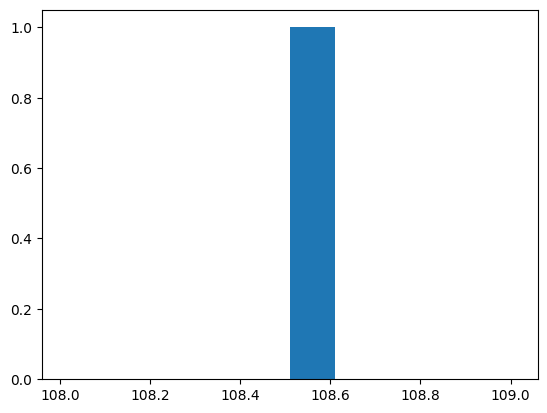

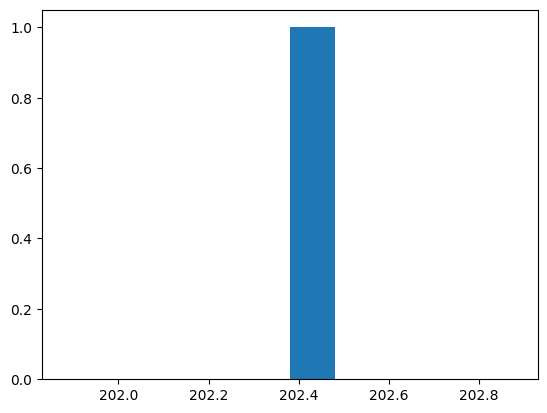

In [8]:
for i in range(len(first_data_list)):
    plt.hist(first_data_list[i])
    plt.show()
    plt.hist(second_data_list[i])
    plt.show()